<a href="https://colab.research.google.com/github/ilanmoshe52/Final_Project/blob/main/wavelets1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

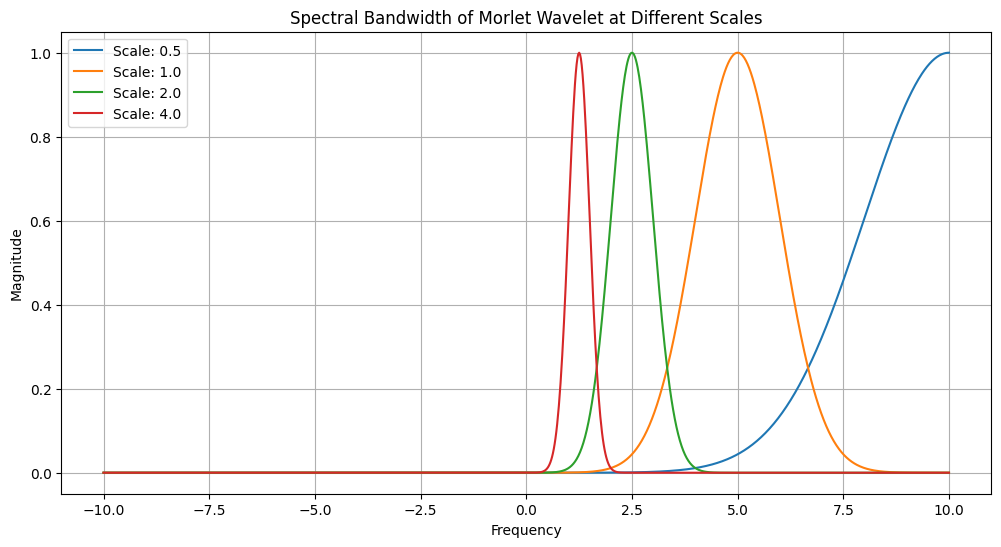

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Function to compute the Fourier transform of the Morlet wavelet
def morlet_wavelet_ft(scale, w=5.0):
    # Define the frequency axis
    freq = np.linspace(-10, 10, 1000)
    # Compute the Fourier transform of the Morlet wavelet
    ft = np.exp(-0.5 * (scale * freq - w) ** 2) * (np.abs(scale * freq) >= 0.0)
    return freq, ft

# Function to plot the spectral bandwidth
def plot_spectral_bandwidth(scales):
    plt.figure(figsize=(12, 6))

    for scale in scales:
        freq, ft = morlet_wavelet_ft(scale)
        plt.plot(freq, np.abs(ft), label=f'Scale: {scale}')

    plt.title('Spectral Bandwidth of Morlet Wavelet at Different Scales')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define a range of scales
scales = [0.5, 1.0, 2.0, 4.0]

# Plot the spectral bandwidth for these scales
plot_spectral_bandwidth(scales)


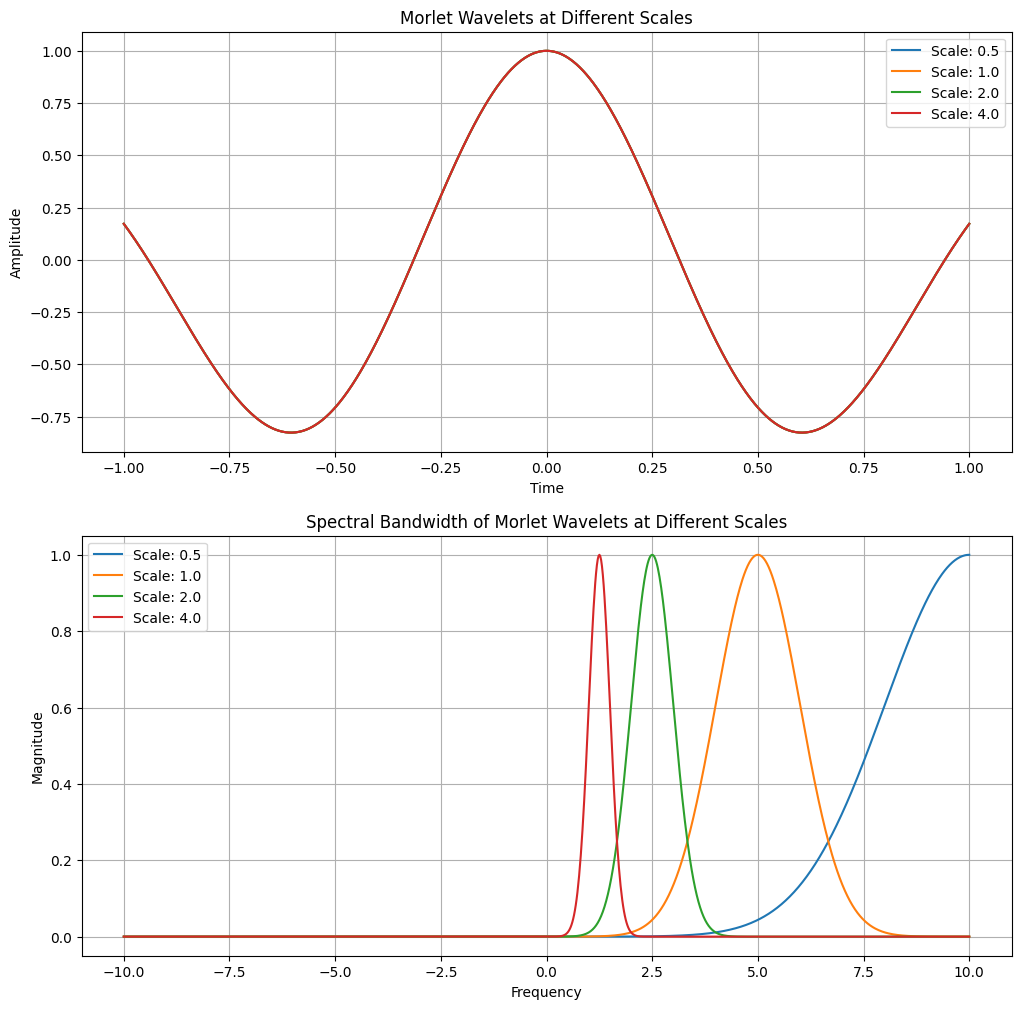

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Function to compute the Morlet wavelet
def morlet_wavelet(scale, w=5.0, s=1.0):
    t = np.linspace(-1, 1, 1000)
    wavelet = np.exp(1j * w * t) * np.exp(-t**2 / (2 * s**2))
    return t, wavelet

# Function to compute the Fourier transform of the Morlet wavelet
def morlet_wavelet_ft(scale, w=5.0):
    freq = np.linspace(-10, 10, 1000)
    ft = np.exp(-0.5 * (scale * freq - w) ** 2) * (np.abs(scale * freq) >= 0.0)
    return freq, ft

# Function to plot the wavelets and their spectral bandwidth
def plot_wavelets_and_spectral_bandwidth(scales):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))

    for scale in scales:
        # Time-domain wavelet
        t, wavelet = morlet_wavelet(scale)
        axs[0].plot(t, np.real(wavelet), label=f'Scale: {scale}')

        # Frequency-domain wavelet
        freq, ft = morlet_wavelet_ft(scale)
        axs[1].plot(freq, np.abs(ft), label=f'Scale: {scale}')

    # Plot settings for time-domain wavelets
    axs[0].set_title('Morlet Wavelets at Different Scales')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()
    axs[0].grid(True)

    # Plot settings for frequency-domain wavelets
    axs[1].set_title('Spectral Bandwidth of Morlet Wavelets at Different Scales')
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('Magnitude')
    axs[1].legend()
    axs[1].grid(True)

    plt.show()

# Define a range of scales
scales = [0.5, 1.0, 2.0, 4.0]

# Plot the wavelets and their spectral bandwidth for these scales
plot_wavelets_and_spectral_bandwidth(scales)


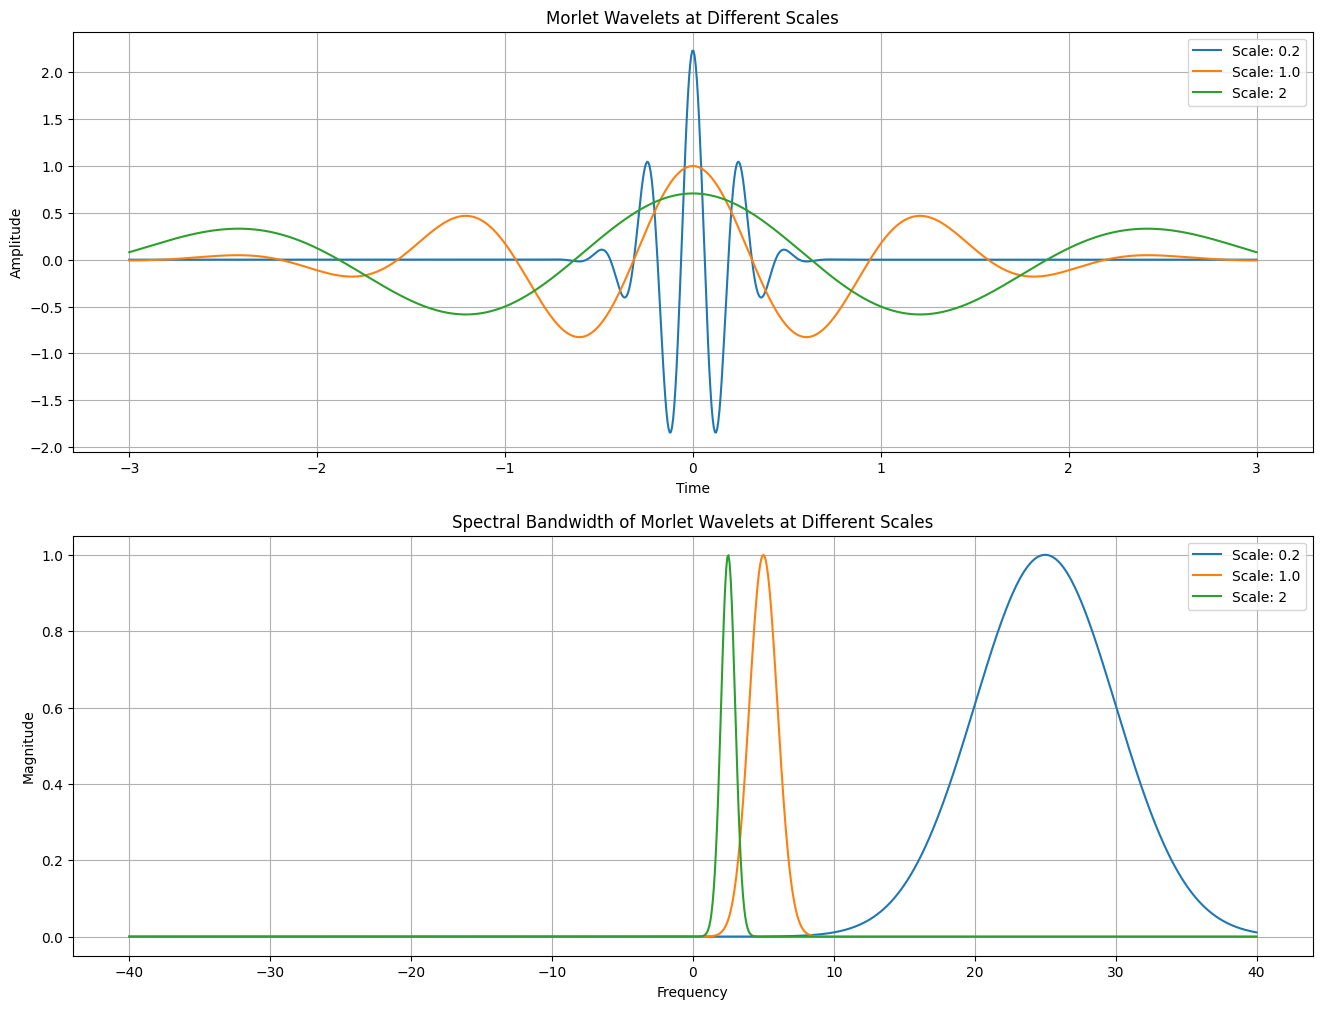

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Function to compute the Morlet wavelet
def morlet_wavelet(scale, w=5.0, s=1.0):
    t = np.linspace(-3, 3, 1000)
    wavelet = np.exp(1j * w * t / scale) * np.exp(-t**2 / (2 * (s * scale)**2))  / np.sqrt(scale)
    return t, wavelet

# Function to compute the Fourier transform of the Morlet wavelet
def morlet_wavelet_ft(scale, w=5.0):
    freq = np.linspace(-40, 40, 1000)
    ft = np.exp(-0.5 * (scale * freq - w) ** 2) * (np.abs(scale * freq) >= 0.0)
    return freq, ft

# Function to plot the wavelets and their spectral bandwidth
def plot_wavelets_and_spectral_bandwidth(scales):
    fig, axs = plt.subplots(2, 1, figsize=(16, 12))

    for scale in scales:
        # Time-domain wavelet
        t, wavelet = morlet_wavelet(scale)
        axs[0].plot(t, np.real(wavelet), label=f'Scale: {scale}')

        # Frequency-domain wavelet
        freq, ft = morlet_wavelet_ft(scale)
        axs[1].plot(freq, np.abs(ft), label=f'Scale: {scale}')

    # Plot settings for time-domain wavelets
    axs[0].set_title('Morlet Wavelets at Different Scales')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()
    axs[0].grid(True)

    # Plot settings for frequency-domain wavelets
    axs[1].set_title('Spectral Bandwidth of Morlet Wavelets at Different Scales')
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel('Magnitude')
    axs[1].legend()
    axs[1].grid(True)

    plt.show()

# Define a range of scales
#scales = [0.5, 1.0, 2.0, 4.0]
scales = [0.2, 1.0 , 2]

# Plot the wavelets and their spectral bandwidth for these scales
plot_wavelets_and_spectral_bandwidth(scales)


<ipython-input-10-732fdf326ca2>:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[0, 0].stem(dec_lo, use_line_collection=True, basefmt=" ", label='Low-pass Filter Taps')
<ipython-input-10-732fdf326ca2>:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[0, 1].stem(dec_hi, use_line_collection=True, basefmt=" ", label='High-pass Filter Taps')


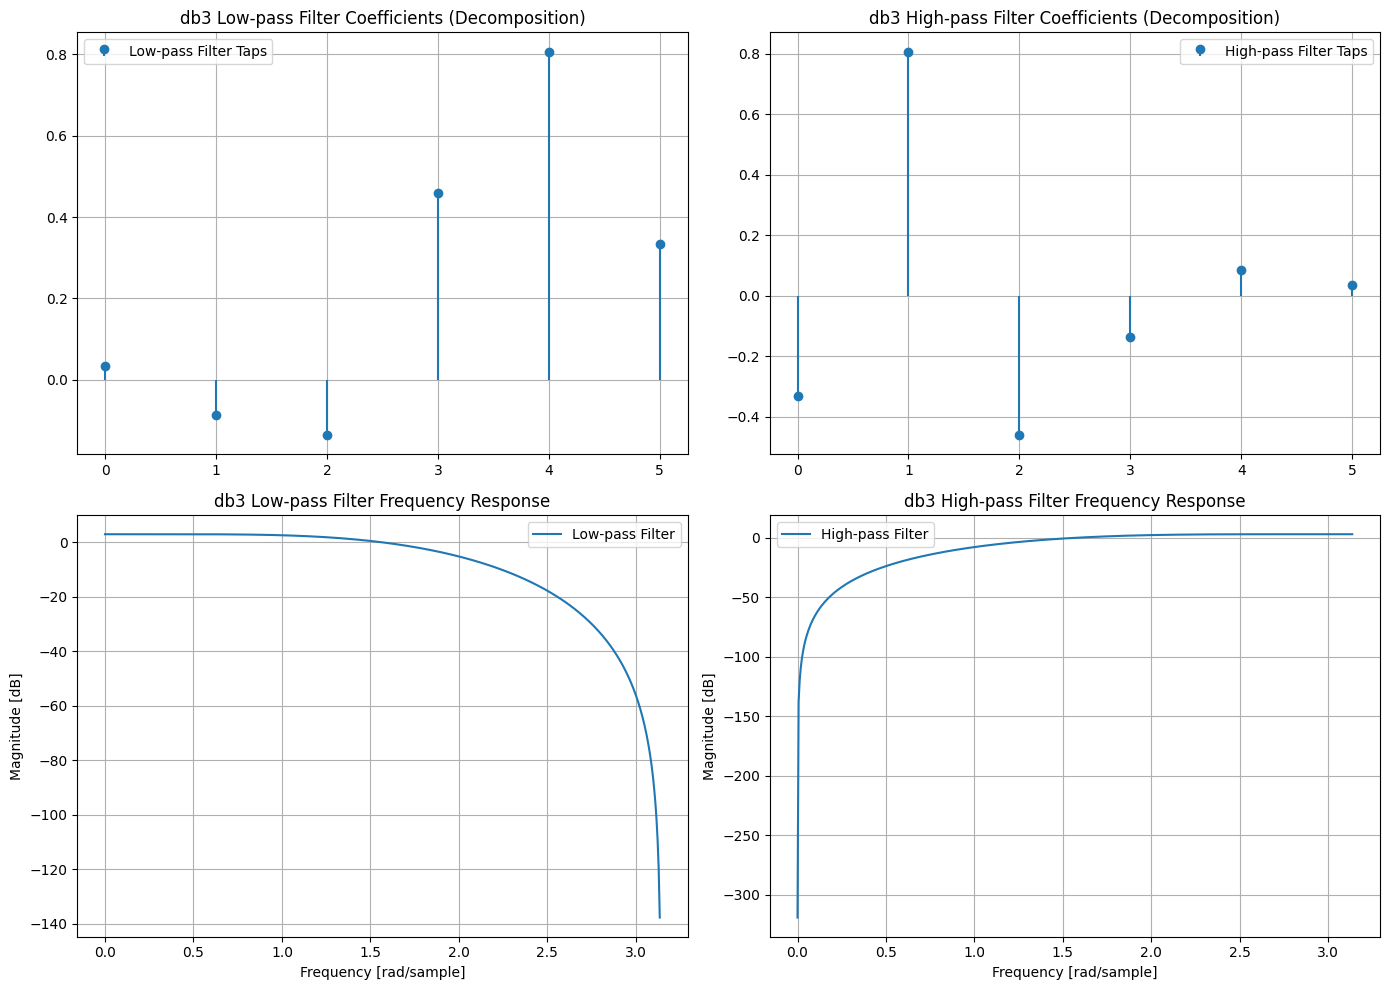

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Function to get filter coefficients of a given wavelet
def get_wavelet_filters(wavelet_name):
    wavelet = pywt.Wavelet(wavelet_name)
    return wavelet.dec_lo, wavelet.dec_hi, wavelet.rec_lo, wavelet.rec_hi

# Function to plot the filter coefficients and frequency response
def plot_filters_frequency_response(wavelet_name):
    dec_lo, dec_hi, rec_lo, rec_hi = get_wavelet_filters(wavelet_name)

    # Compute frequency response
    w_lo, h_lo = freqz(dec_lo)
    w_hi, h_hi = freqz(dec_hi)

    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Plot filter coefficients
    axs[0, 0].stem(dec_lo, use_line_collection=True, basefmt=" ", label='Low-pass Filter Taps')
    axs[0, 0].set_title(f'{wavelet_name} Low-pass Filter Coefficients (Decomposition)')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    axs[0, 1].stem(dec_hi, use_line_collection=True, basefmt=" ", label='High-pass Filter Taps')
    axs[0, 1].set_title(f'{wavelet_name} High-pass Filter Coefficients (Decomposition)')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # Plot frequency response
    axs[1, 0].plot(w_lo, 20 * np.log10(abs(h_lo)), label='Low-pass Filter')
    axs[1, 0].set_title(f'{wavelet_name} Low-pass Filter Frequency Response')
    axs[1, 0].set_xlabel('Frequency [rad/sample]')
    axs[1, 0].set_ylabel('Magnitude [dB]')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    axs[1, 1].plot(w_hi, 20 * np.log10(abs(h_hi)), label='High-pass Filter')
    axs[1, 1].set_title(f'{wavelet_name} High-pass Filter Frequency Response')
    axs[1, 1].set_xlabel('Frequency [rad/sample]')
    axs[1, 1].set_ylabel('Magnitude [dB]')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Specify the wavelet name
wavelet_name = 'db3'  # You can change this to any valid wavelet name in PyWavelets

# Plot the filter coefficients and frequency response for the specified wavelet
plot_filters_frequency_response(wavelet_name)


In [ ]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

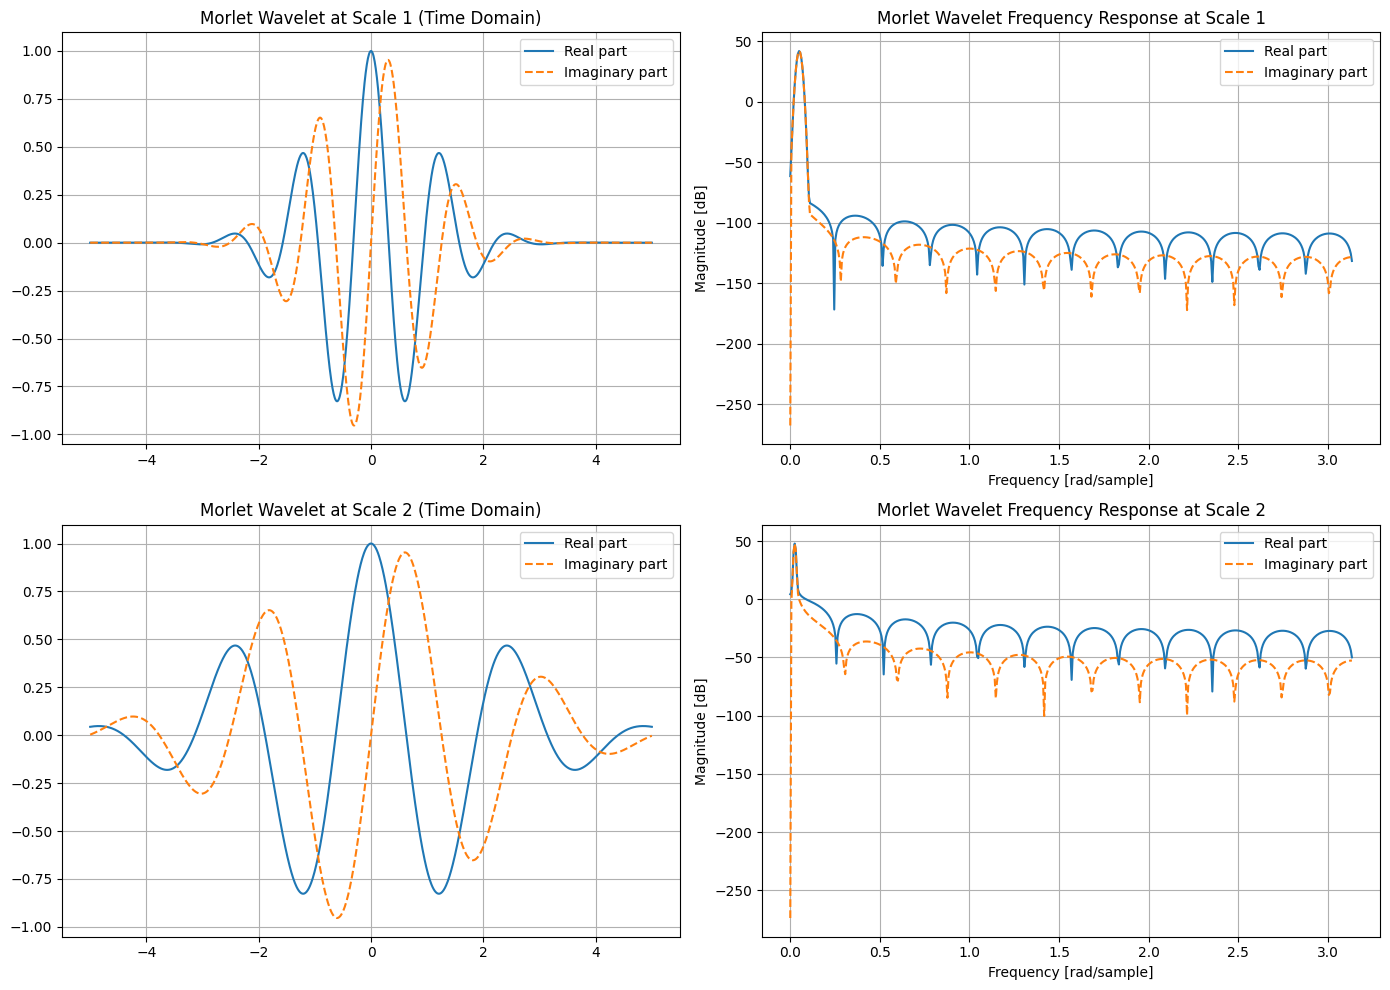

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import freqz

# Function to compute the Morlet wavelet filter response at different scales
def morlet_wavelet_filter_response(scales, w=5.0, s=1.0):
    fig, axs = plt.subplots(len(scales), 2, figsize=(14, 5 * len(scales)))

    for i, scale in enumerate(scales):
        # Create the wavelet at the given scale
        t = np.linspace(-5, 5, 1000)
        wavelet = np.exp(1j * w * t / scale) * np.exp(-t**2 / (2 * (s * scale)**2))

        # Compute the frequency response of the wavelet
        w_lo, h_lo = freqz(np.real(wavelet))
        w_hi, h_hi = freqz(np.imag(wavelet))

        # Plot the time-domain wavelet
        axs[i, 0].plot(t, np.real(wavelet), label='Real part')
        axs[i, 0].plot(t, np.imag(wavelet), label='Imaginary part', linestyle='dashed')
        axs[i, 0].set_title(f'Morlet Wavelet at Scale {scale} (Time Domain)')
        axs[i, 0].legend()
        axs[i, 0].grid(True)

        # Plot the frequency response
        axs[i, 1].plot(w_lo, 20 * np.log10(np.abs(h_lo)), label='Real part')
        axs[i, 1].plot(w_hi, 20 * np.log10(np.abs(h_hi)), label='Imaginary part', linestyle='dashed')
        axs[i, 1].set_title(f'Morlet Wavelet Frequency Response at Scale {scale}')
        axs[i, 1].set_xlabel('Frequency [rad/sample]')
        axs[i, 1].set_ylabel('Magnitude [dB]')
        axs[i, 1].legend()
        axs[i, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Define a range of scales
scales = [1,2]

# Plot the wavelets and their frequency response for these scales
morlet_wavelet_filter_response(scales)


Center frequency (fc): 812.5


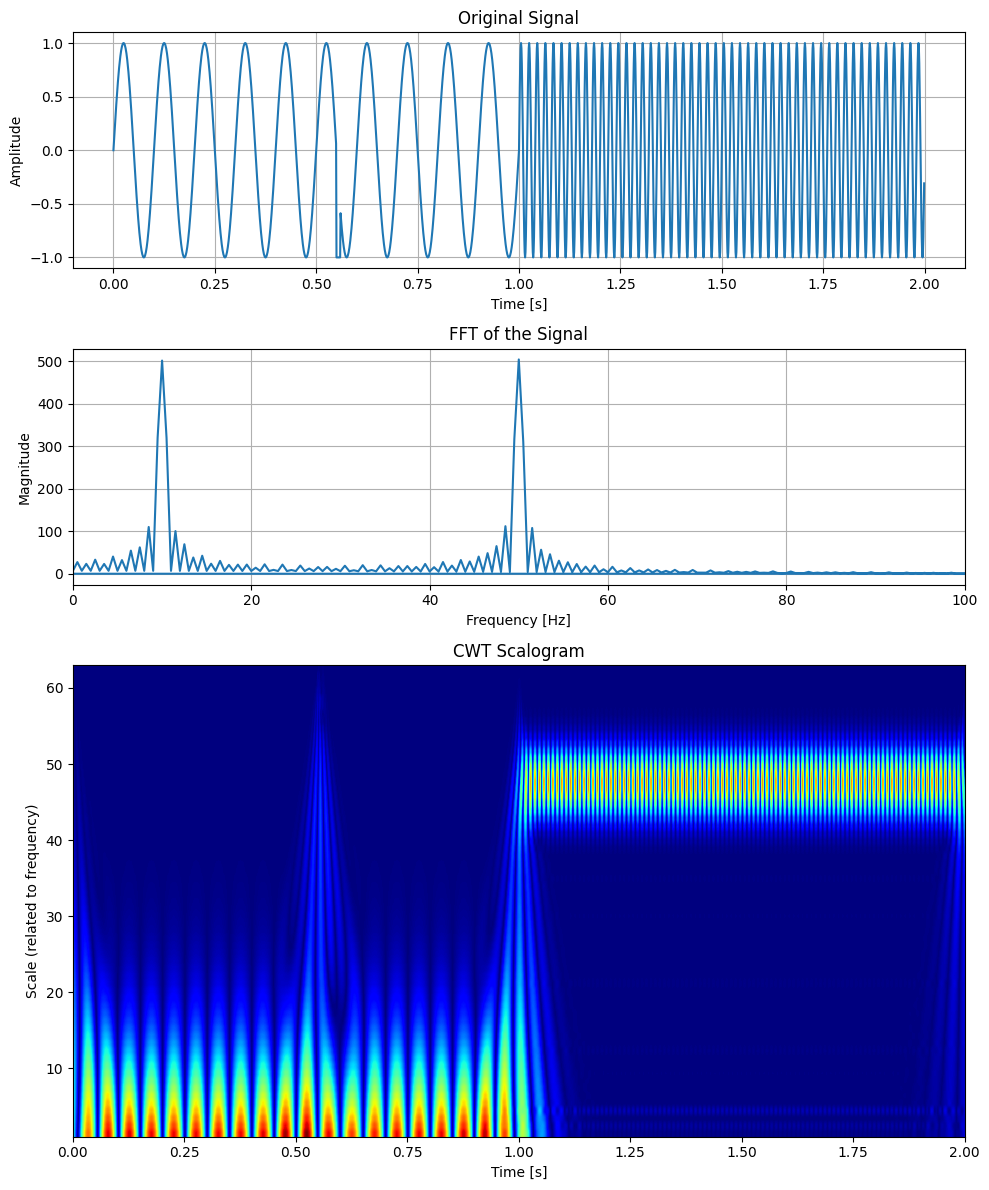

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft, fftfreq

# Step 1: Generate the time-domain signal
sampling_rate = 1000  # Sampling rate in Hz
duration = 2  # Duration in seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# First half of the signal with frequency 5 Hz, second half with frequency 50 Hz
signal = np.concatenate([np.sin(2 * np.pi * 10 * t[:len(t)//2]),
                         np.sin(2 * np.pi * 50 * t[len(t)//2:])])

#signal[520:530] = -1
signal[550:560] = -1

# Step 2: Compute the FFT of the signal
fft_vals = fft(signal)
fft_freqs = fftfreq(len(signal), 1/sampling_rate)

# Step 3: Compute the CWT of the signal
scales = np.arange(1, 64)
cwt_coeffs, freqs = pywt.cwt(signal, scales, 'morl', sampling_period=1/sampling_rate)

fc = freqs[0]
print("Center frequency (fc):", fc)

# Step 4: Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [1, 1, 2]})

# Plot original signal
ax[0].plot(t, signal)
ax[0].set_title('Original Signal')
ax[0].grid(True)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')

# Plot FFT of the signal
ax[1].plot(fft_freqs, np.abs(fft_vals))
ax[1].set_title('FFT of the Signal')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Magnitude')
ax[1].grid(True)
ax[1].set_xlim(0, 100)

# Plot CWT scalogram
ax[2].imshow(np.abs(cwt_coeffs), extent=[0, duration, scales[0], scales[-1]], aspect='auto', cmap='jet')  #, origin='lower'
#ax[2].imshow(np.abs(cwt_matrix), extent=[t.min(), t.max(), freqs.max(), freqs.min()], aspect='auto' , cmap='jet',)
ax[2].set_title('CWT Scalogram')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Scale (related to frequency)')
#fig.colorbar(im, ax=ax[2], orientation='horizontal')

# Adjust subplots layout
plt.tight_layout()
plt.show()


In [ ]:
len(t) ,sampling_rate ,  1/sampling_rate

(2000, 1000, 0.001)

In [ ]:
cwt_coeffs.shape , freqs.shape

((127, 2000), (127,))

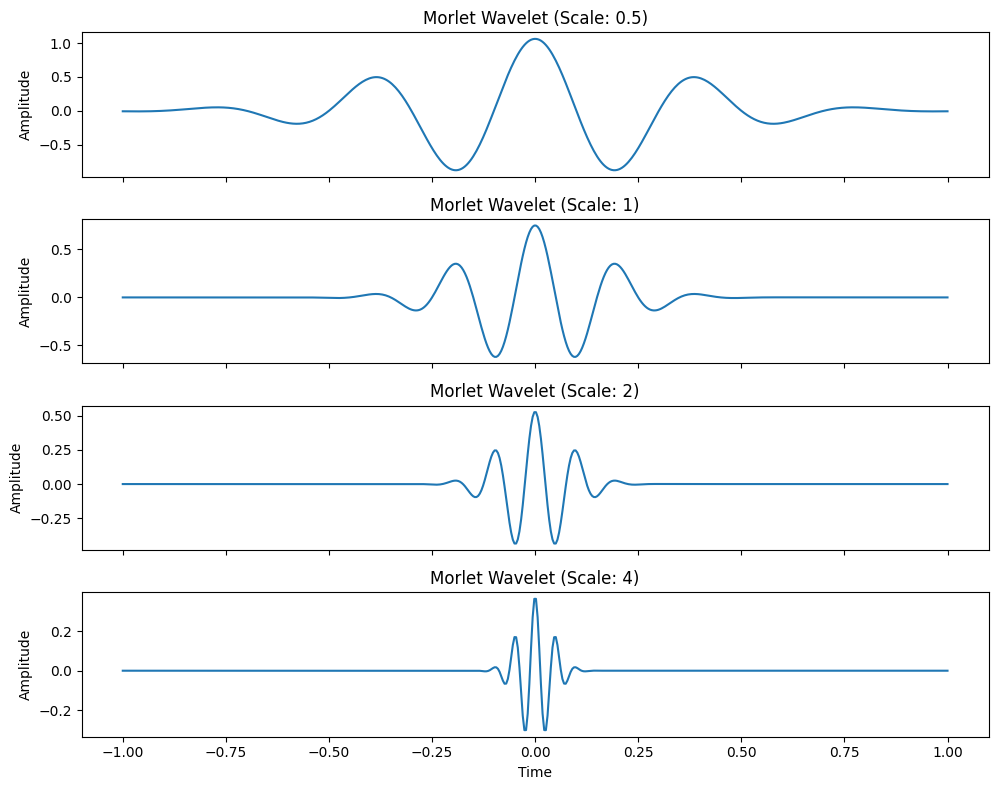

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import morlet

# Define time array
t = np.linspace(-1, 1, 500)

# Define scales
scales = [0.5, 1, 2, 4]

# Generate and plot wavelets at different scales
fig, ax = plt.subplots(len(scales), 1, figsize=(10, 8), sharex=True)

for i, scale in enumerate(scales):
    # Generate Morlet wavelet
    wavelet = morlet(M=len(t), w=5.0, s=scale)
    # Normalize wavelet according to scale
    normalized_wavelet = wavelet / np.sqrt(scale)
    ax[i].plot(t, normalized_wavelet)
    ax[i].set_title(f'Morlet Wavelet (Scale: {scale})')
    ax[i].set_ylabel('Amplitude')

plt.xlabel('Time')
plt.tight_layout()
plt.show()


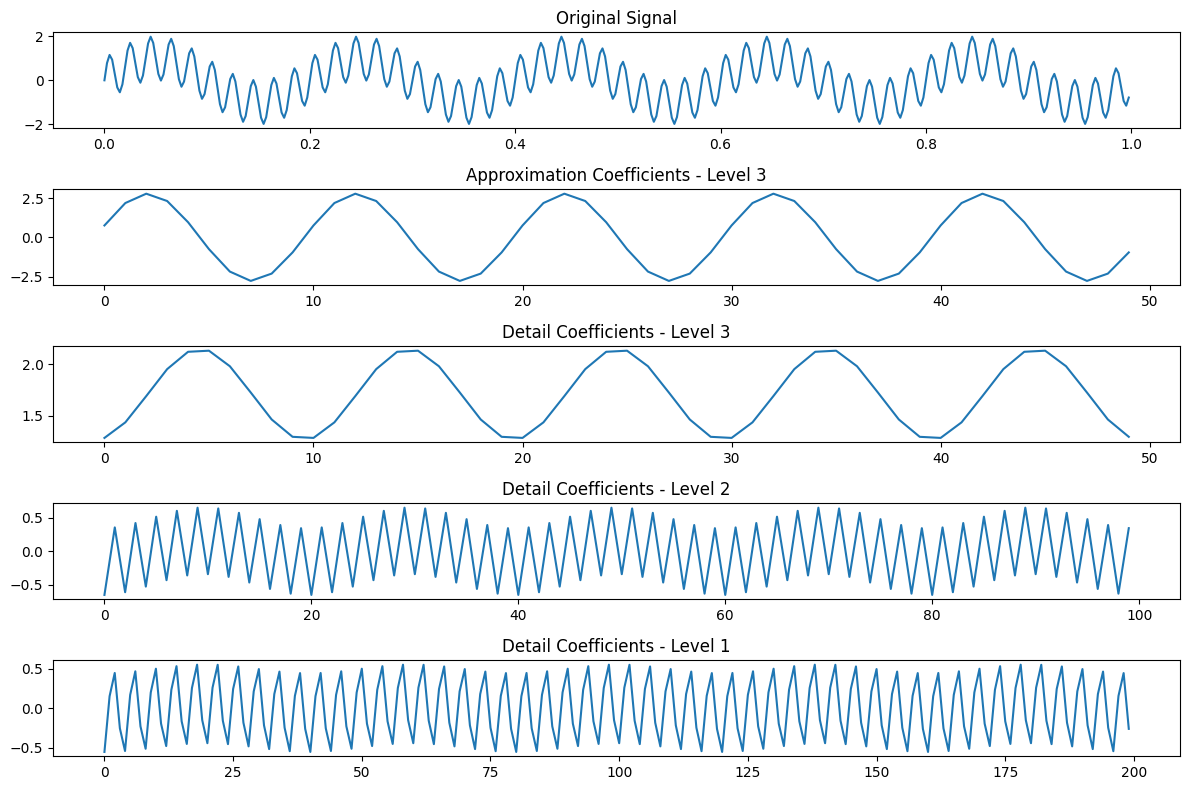

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a sample signal
t = np.linspace(0, 1, 400, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 50 * t)

# Perform DWT
coeffs = pywt.wavedec(signal, 'db1', level=3)
cA3, cD3, cD2, cD1 = coeffs

# Plot original signal and DWT coefficients
fig, ax = plt.subplots(5, 1, figsize=(12, 8))

ax[0].plot(t, signal)
ax[0].set_title('Original Signal')

ax[1].plot(cA3)
ax[1].set_title('Approximation Coefficients - Level 3')

ax[2].plot(cD3)
ax[2].set_title('Detail Coefficients - Level 3')

ax[3].plot(cD2)
ax[3].set_title('Detail Coefficients - Level 2')

ax[4].plot(cD1)
ax[4].set_title('Detail Coefficients - Level 1')

plt.tight_layout()
plt.show()


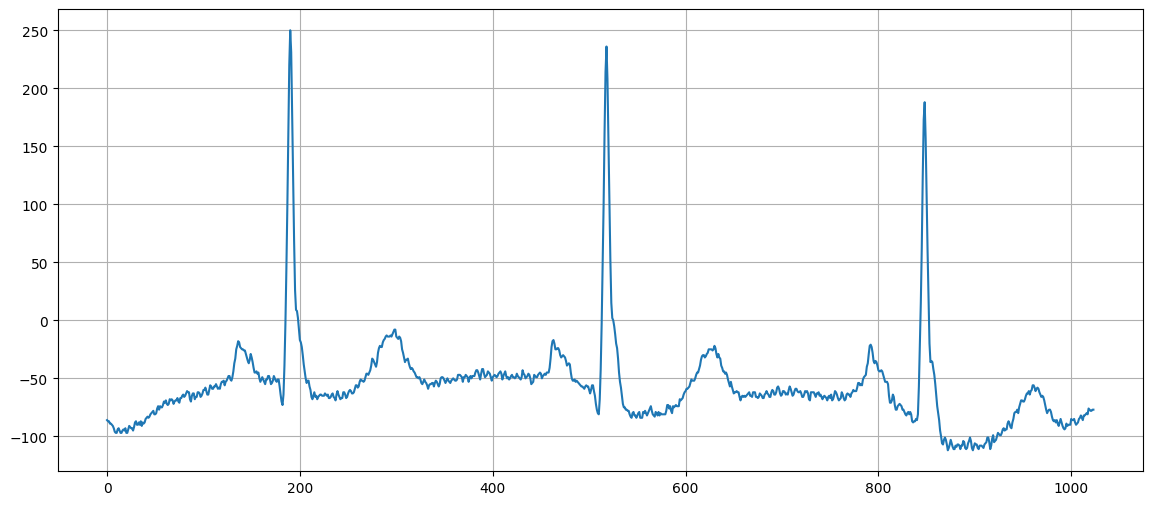

In [ ]:
x = pywt.data.ecg()
plt.figure(figsize=(14,6))
plt.grid(True)
plt.plot(x)
plt.show()
x.shape
signal = x

In [ ]:
len(x) , len(t)

(1024, 1024)

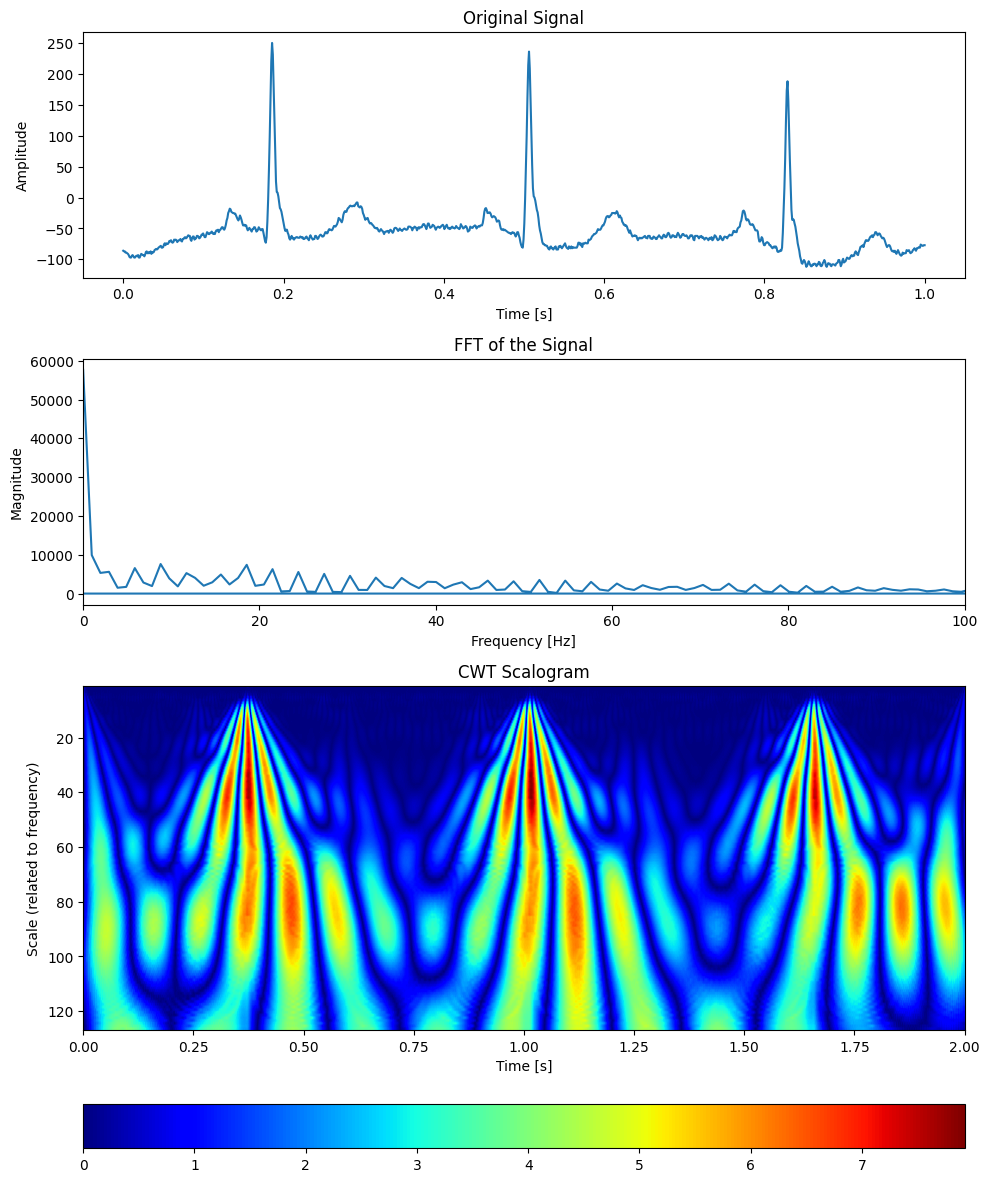

In [ ]:
t = np.linspace(0,1,len(x))

# Step 2: Compute the FFT of the signal
fft_vals = fft(signal)
fft_freqs = fftfreq(len(signal), 1/sampling_rate)

# Step 3: Compute the CWT of the signal
scales = np.arange(1, 128)
cwt_coeffs, freqs = pywt.cwt(signal, scales, 'morl',1)

# Step 4: Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [1, 1, 2]})

# Plot original signal
ax[0].plot(t, signal)
ax[0].set_title('Original Signal')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')

# Plot FFT of the signal
ax[1].plot(fft_freqs, np.abs(fft_vals))
ax[1].set_title('FFT of the Signal')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Magnitude')
ax[1].set_xlim(0, 100)

# Plot CWT scalogram
ax[2].imshow(np.abs(cwt_coeffs), extent=[0, duration, scales[-1], scales[0]], aspect='auto', cmap='jet')  #, origin='lower'
#ax[2].imshow(np.abs(cwt_matrix), extent=[t.min(), t.max(), freqs.max(), freqs.min()], aspect='auto' , cmap='jet',)
ax[2].set_title('CWT Scalogram')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Scale (related to frequency)')
fig.colorbar(im, ax=ax[2], orientation='horizontal')

# Adjust subplots layout
plt.tight_layout()
plt.show()
